## Problem statement:-
##### The aim of the project is to predict fraudulent credit cart transactions using machine learning models.This id crucial from the bank's as well  aas customer's perspective. The banks cannot afford to lode their customers money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions. The dataset contains transactions made over a period of two days in September 2013 by european credit cardholders.The dataset is highly unbalanced, the positive class (frauds)accoumt for 0.172% of all transactions. We need to take caare of the data imbalance while the best model by trying various algorithns

## Steps:-
##### the steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps
##### 1.Reading, understanding and visualising the data
##### 2. Preparing the data for modelling
##### 3. Building the model
##### 4. Evsluate the model

In [4]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', 500)

## Exploratory Data analysis

### Reading and understanding the data

In [6]:
# Reading the dataset 
df = pd.read_csv('C:\\Users\\katta\\Downloads\\archive\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Handling missing values

In [10]:
#handling missing values in columns
#checking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [11]:
#checking the distribution of the class
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

np.float64(99.83)

In [13]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

np.float64(0.17)

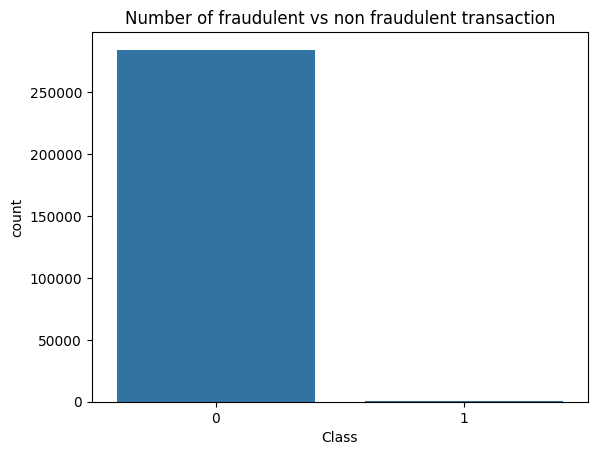

In [14]:
#bar plot for the number of fraudulent vs non-faudulent transactions
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non fraudulent transaction')
plt.show()

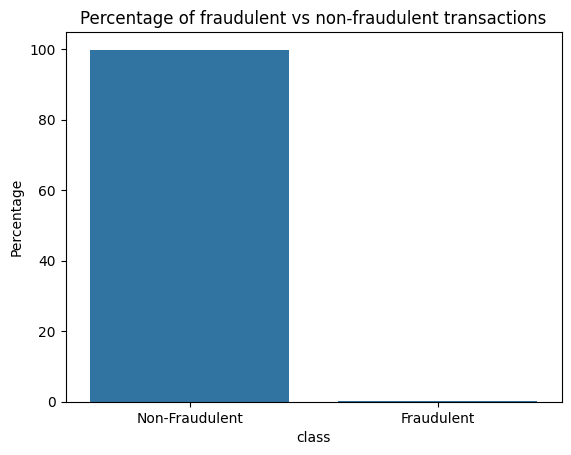

In [15]:
#Bar plot for the persentage of fraudulent vs non-fraudlent transactions 
fraud_percentage = {'class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transactions')
plt.show()

### outliers treatment
##### we are not performing any outliers trearment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data

In [16]:
#creating fraudulent dataframe
data_fraud = df[df['Class']==1]
#creating non fraudulent dataframe
data_non_fraud = df[df['Class']== 0]

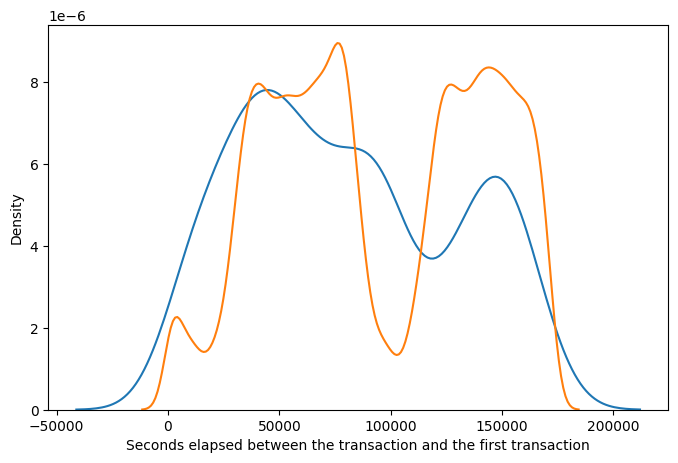

In [17]:
#Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transaction and the first transaction')
plt.show()

#### Analysis
#### We do not see any specific pattern for the fraudulent and non- fraudulent transactions with respect to time. Hence, we drop the time column

In [18]:
#Dropping the Time column
df.drop('Time',axis=1, inplace=True)

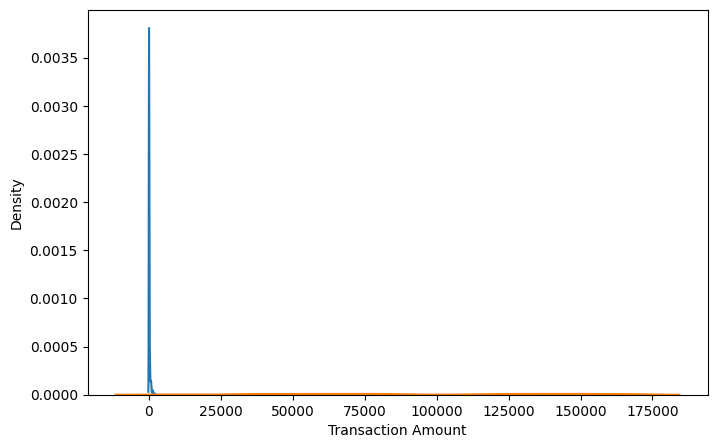

In [19]:
#Observe the distribution of classes with amount
#Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transaction Amount')
plt.show()

#### Analysis
#### We can see that the fraudulent transctions are mostly densed in the lower range of amount,
#### whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

### Train-Test-Split

In [20]:
#import library
!pip install scikit-learn
import sklearn
from sklearn.model_selection import train_test_split

In [21]:
#Putting feature variables into x
X = df.drop(['Class'], axis=1)

In [22]:
#Putting target variable to y
y  = df['Class']

In [23]:
#Splitting data into train and test set 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Feature Scaling
##### We need to scale only the Amount column as all other columns are already scaled by the PCA transformation

In [24]:
#feature scaling
#standardization method
from sklearn.preprocessing import StandardScaler

In [25]:
#Instantiate the Scaler
scaler = StandardScaler()

In [26]:
#fit the data iknto scalar and transfrorm
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [27]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


#### Scaling the test set
#### we don't fit scaler on the set. We only transform the test set.

In [28]:
#transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


### Checking the Skewness

In [29]:
#Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

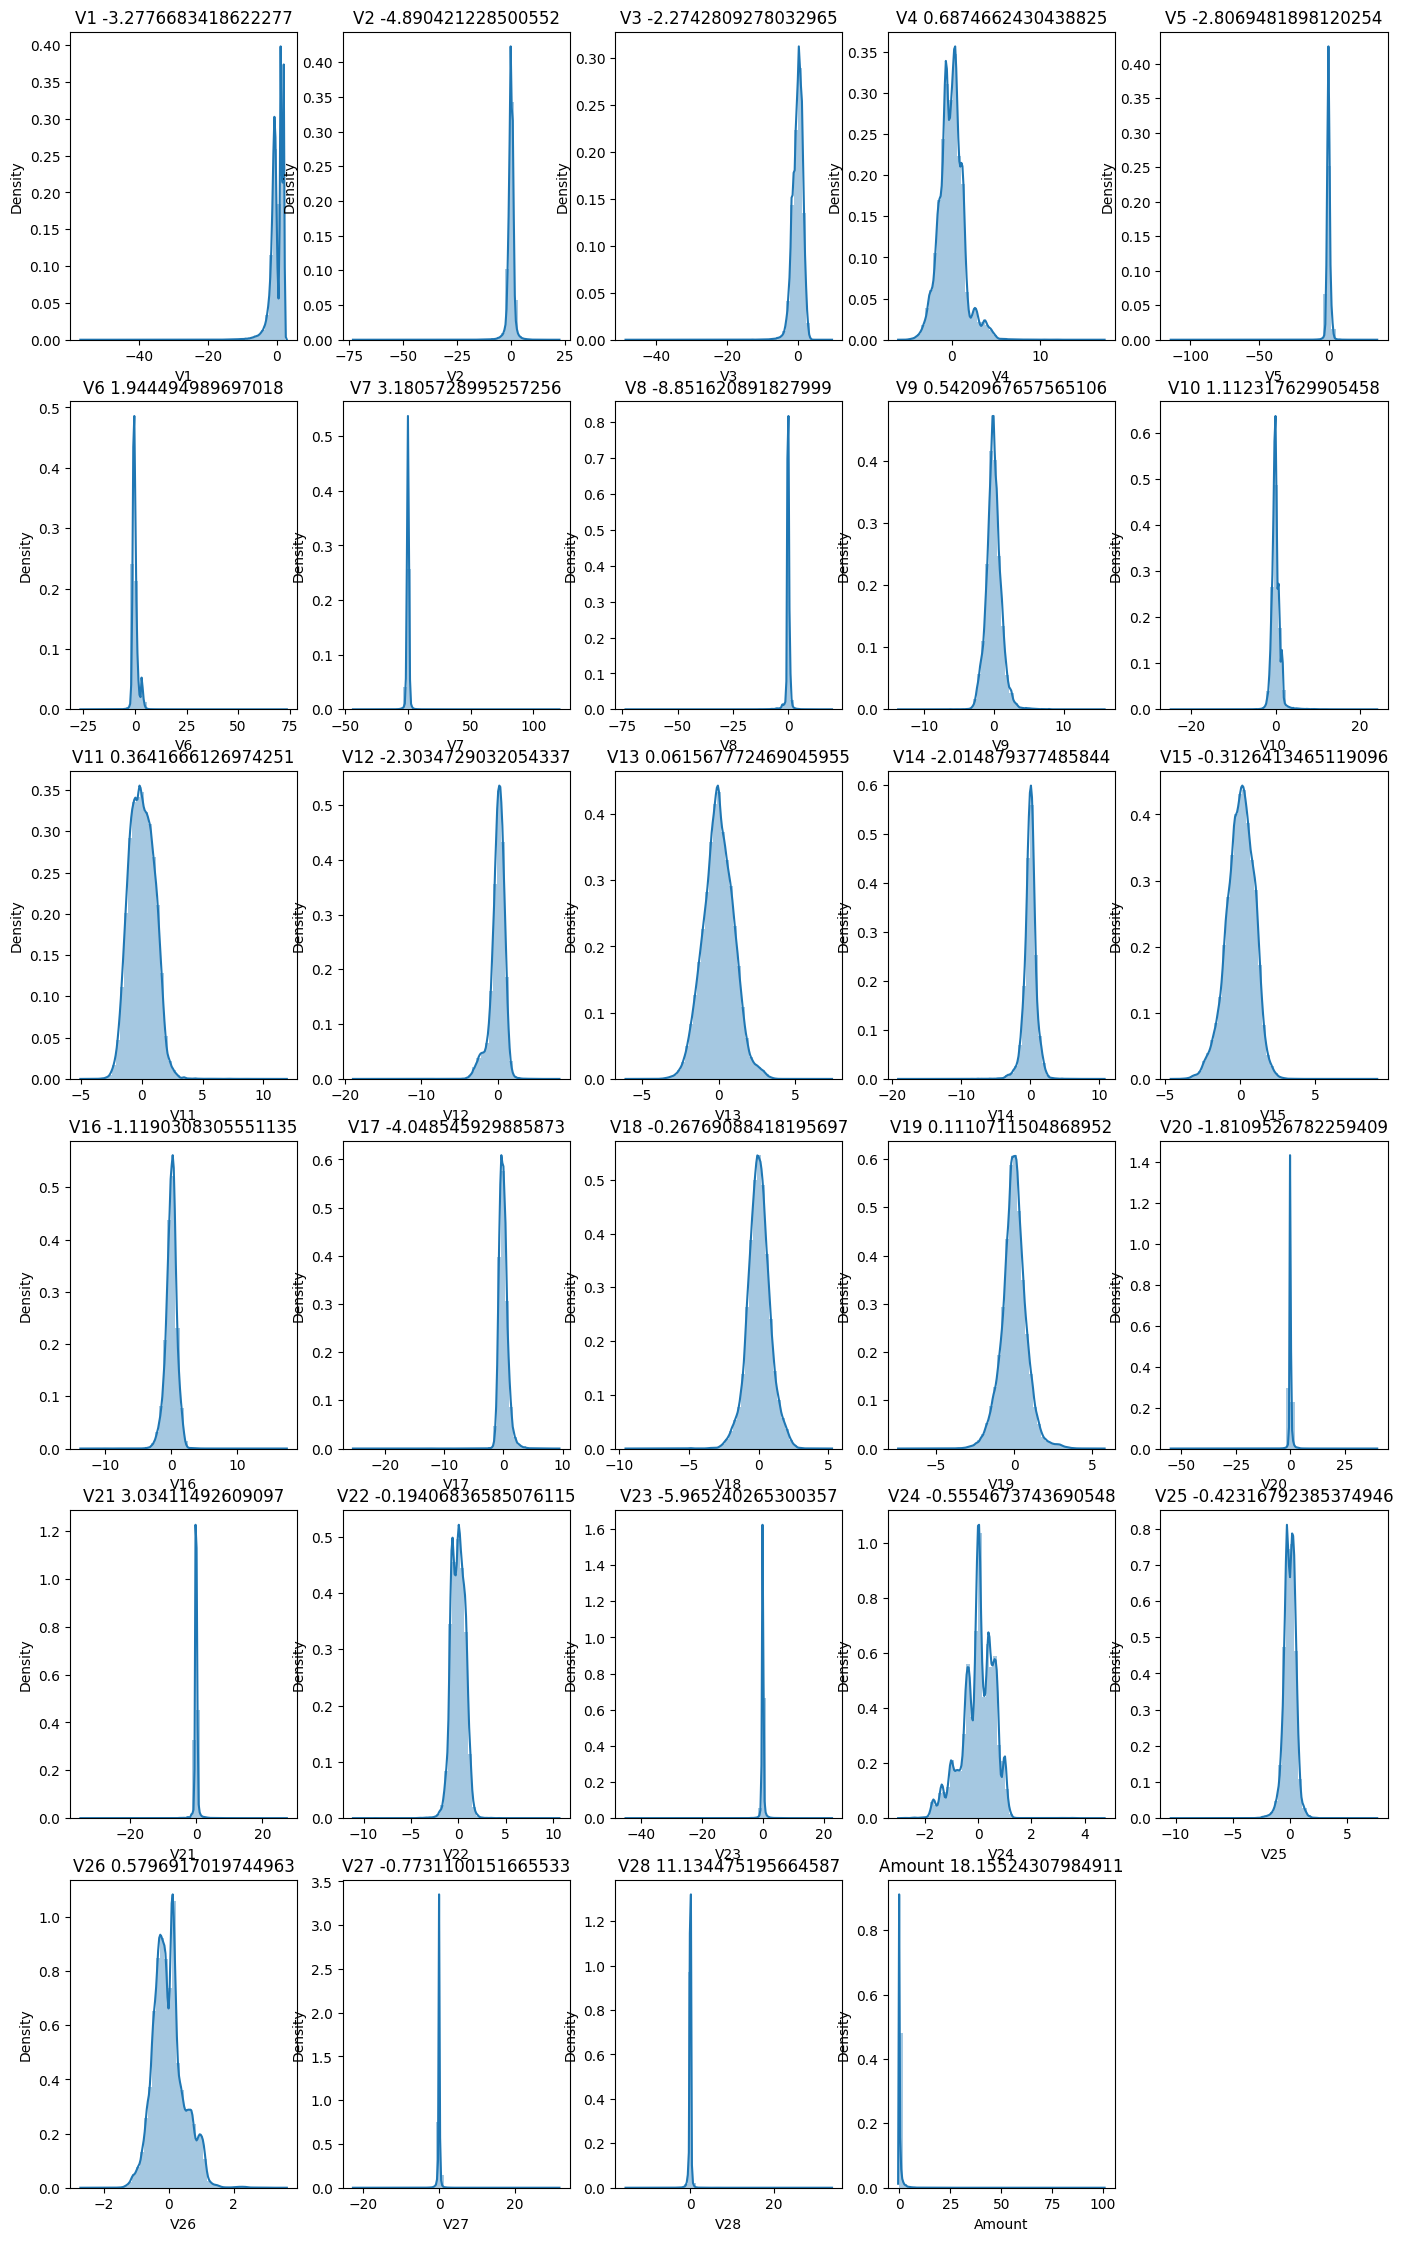

In [30]:
#plotind the distribution of the variables(skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

###### We see that there are many variables,
###### which are heavily skewed.
###### We will migrate the skewness only for those variables 
###### for bringing them into normal distribution.

### Mitigate skewness with PowerTransformer

In [31]:
#mitigate skewness with power transformer
#importing powerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# fit and transform the Pt on training data
X_train[cols] = pt.fit_transform(X_train)

In [32]:
#transform the test set
X_test[cols] = pt.transform(X_test)

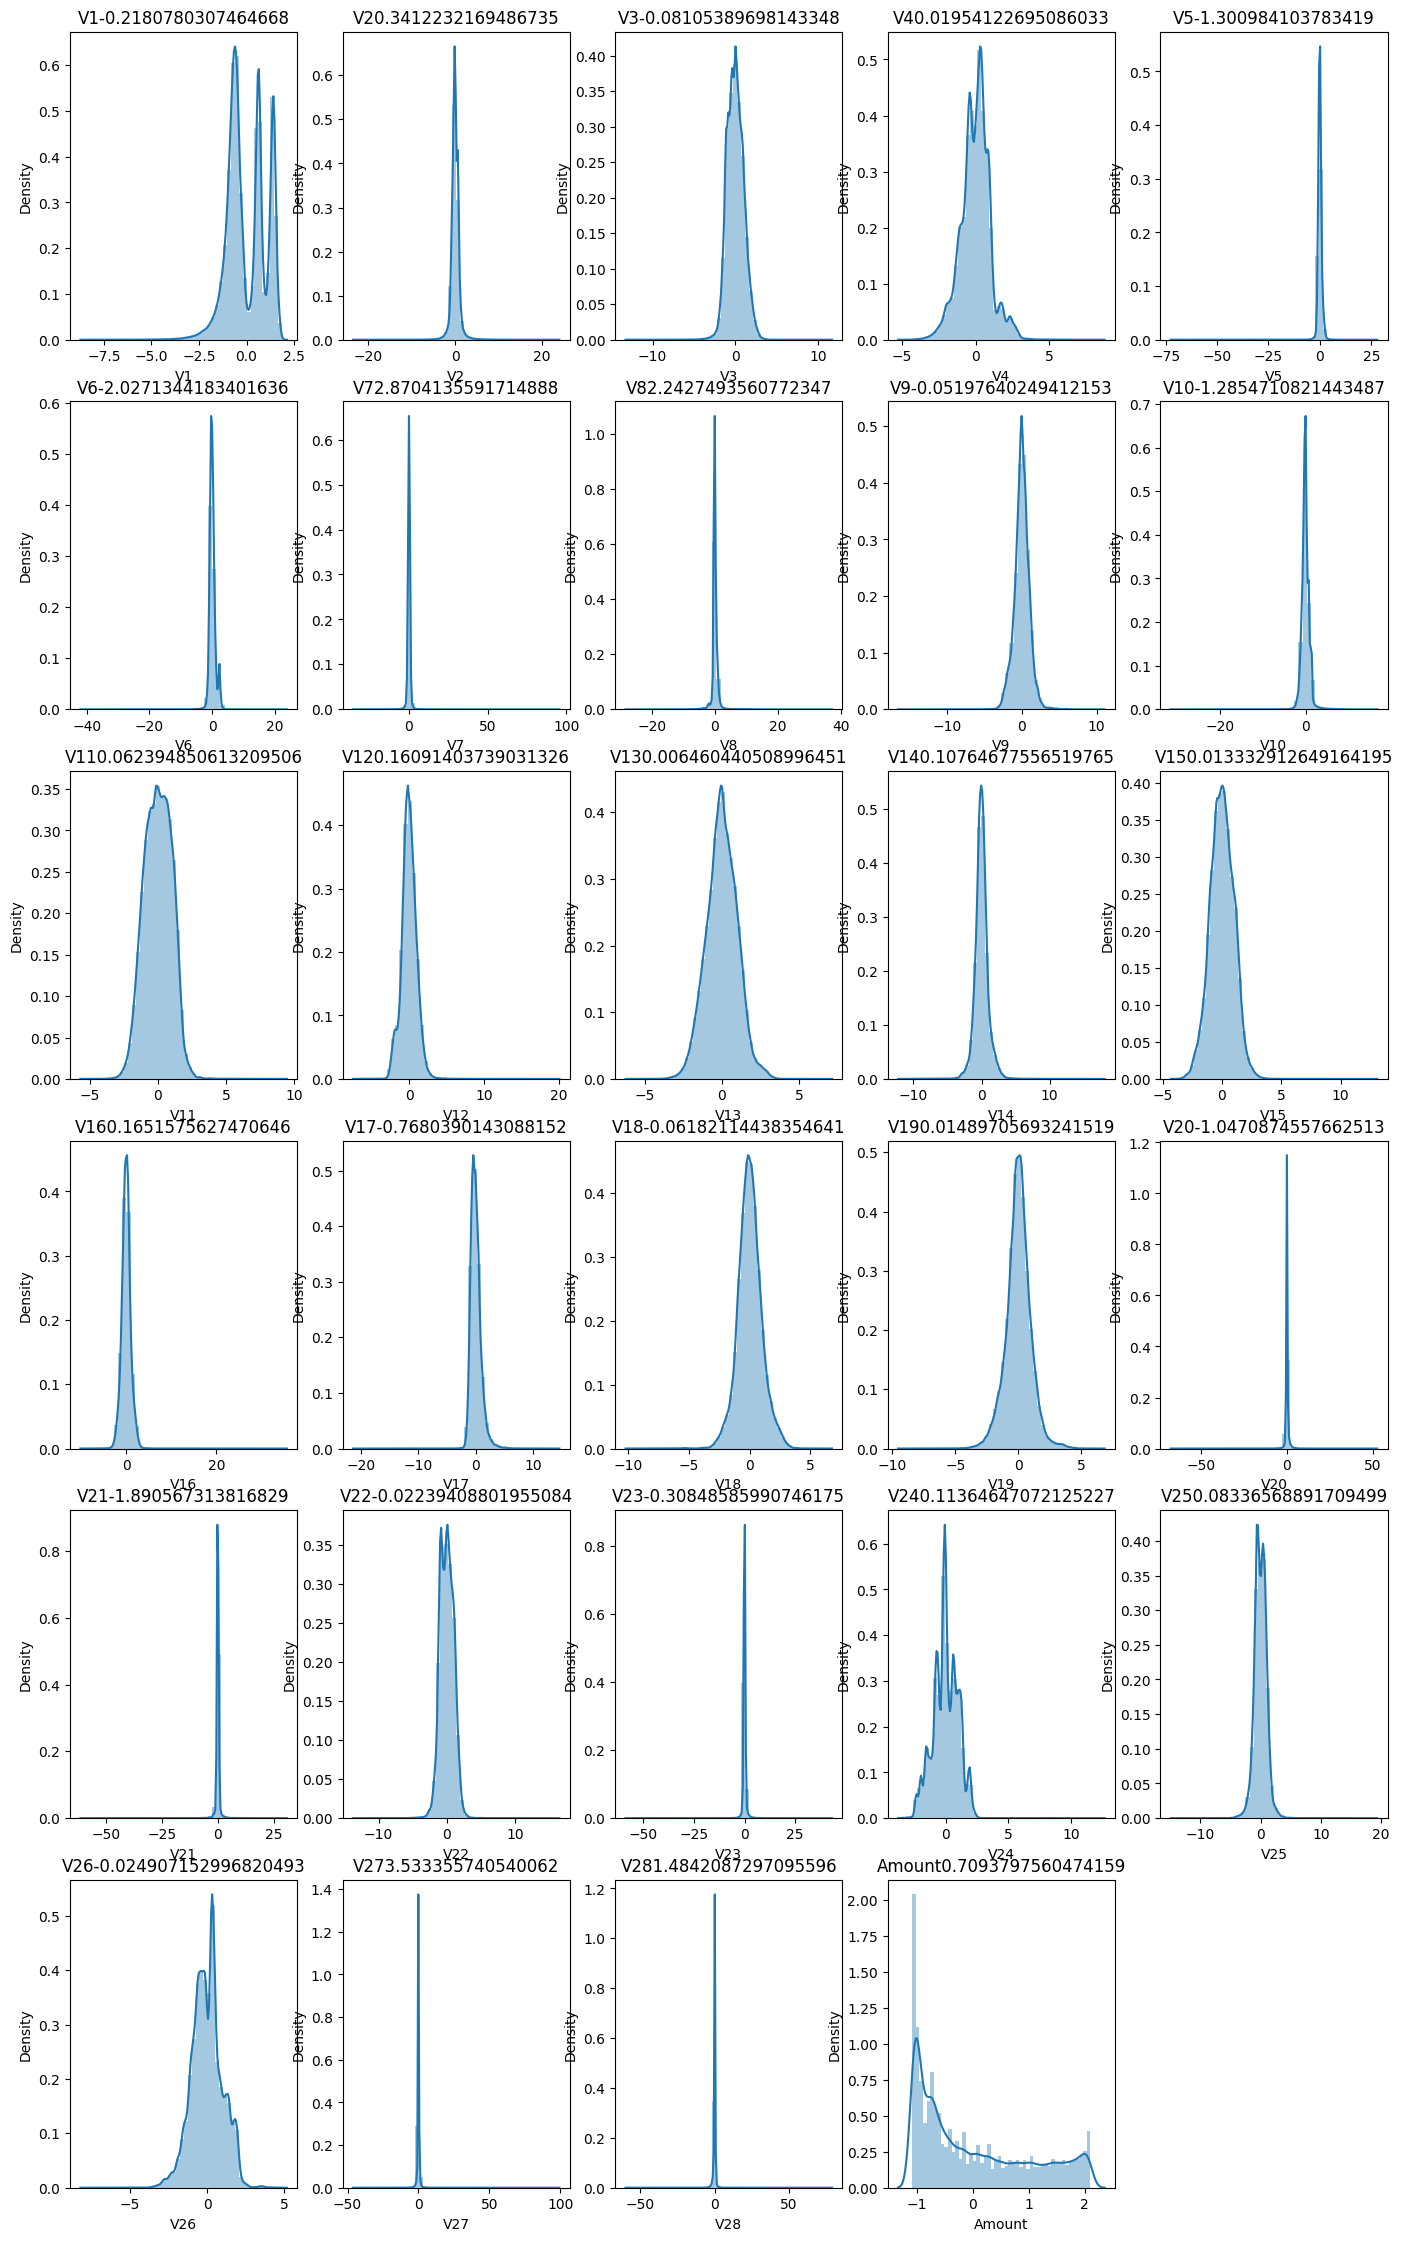

In [33]:
#plotting the distribution of the variables (skewnes) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6,5,k)
    sns.distplot(X_train[col])
    plt.title(col+''+str(X_train[col].skew()))

##### now we can see that all the variables are normally distributed after the transformation

### Model building on imbalanced data
#### Metric selection for heavily imbalanced data
##### As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

##### Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.

#### Why SVM was not tried for model building and Random Forest was not tried for few cases?
##### In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

##### For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

#### Why KNN was not used for model building?
###### KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors

### Logistic regression

In [34]:
#importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [35]:
#importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### Tuning hyperparameter C
##### C is the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regurarization

In [36]:
#importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [37]:
#Creting kflod object with 5 slits
folds = KFold(n_splits=5, shuffle=True, random_state=4)
 #specify params
params = {"C": [0.01,0.1, 1, 10, 100, 1000]}
 #Specifing score as recall as we are more focused on achiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                         param_grid = params,
                         scoring= 'roc_auc',
                         cv = folds,
                         verbose = 1,
                         return_train_score=True)
#Fit the model
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold

In [38]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.446679,0.048535,0.030499,0.002529,0.01,{'C': 0.01},0.986595,0.987068,0.969244,0.981472,0.993990,0.983674,0.008241,1,0.983877,0.984106,0.988321,0.985739,0.982709,0.984950,0.001943
1,0.579182,0.044520,0.056347,0.022837,0.10,{'C': 0.1},0.985593,0.987368,0.966190,0.980005,0.994159,0.982663,0.009395,2,0.982962,0.983607,0.988169,0.984679,0.981988,0.984281,0.002132
2,0.629056,0.076540,0.043392,0.004524,1.00,{'C': 1},0.985601,0.987346,0.960695,0.979551,0.994229,0.981484,0.011399,3,0.982770,0.983390,0.987509,0.984222,0.981921,0.983962,0.001927
3,0.549673,0.025198,0.033091,0.003975,10.00,{'C': 10},0.985580,0.987338,0.961110,0.979525,0.991787,0.981068,0.010726,4,0.982758,0.983365,0.987466,0.984354,0.980767,0.983742,0.002200
4,0.583523,0.077940,0.036882,0.000788,100.00,{'C': 100},0.985578,0.987338,0.959647,0.979517,0.991783,0.980772,0.011272,5,0.982757,0.983362,0.987354,0.984366,0.980764,0.983721,0.002164
5,0.499960,0.032869,0.034710,0.003731,1000.00,{'C': 1000},0.985578,0.987338,0.959637,0.979519,0.991782,0.980771,0.011275,6,0.982757,0.983362,0.987352,0.984367,0.980764,0.983721,0.002164


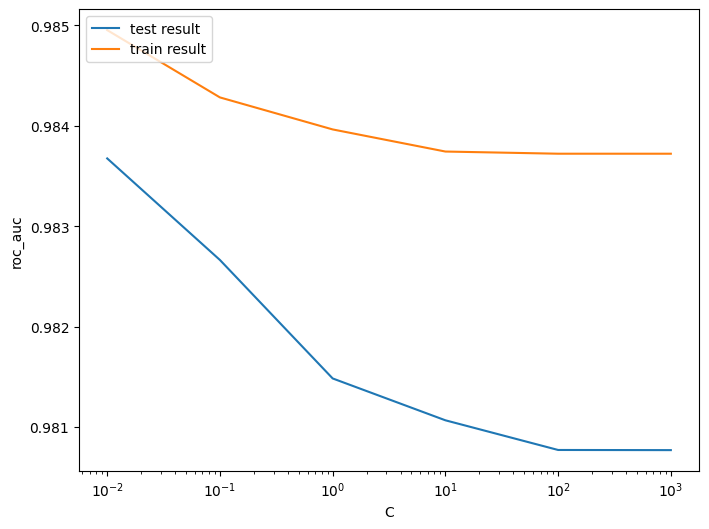

In [39]:
#plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [40]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

The highest test roc_auc is 0.9836736960858568 at C = 0.01


#### Logistic regression with optimal C

In [41]:
# instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [42]:
#Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, Y_train)

#### Prediction on the train set

In [43]:
# confution matrix
confusion = metrics.confusion_matrix(Y_train, Y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [44]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positives
FN = confusion[1,0] #false negative

In [45]:
#Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train))
 #sensitivity
print("Sensitivity:-",TP / float(TP+FN))
# specificity
print("Specificity:-", TN / float(TN+FP))
#F1 score
print("F1-Score:-", f1_score(Y_train, Y_train))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [46]:
# classification_report
print(classification_report(Y_train, Y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



#### ROC on the train set

In [47]:
#roc curve function
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [48]:
#predicted probability
# Example (replace lr with YOUR model name)
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:, 1]

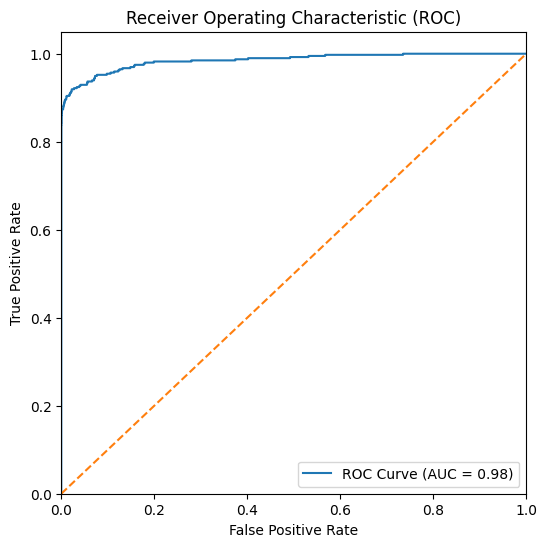

In [49]:
# plot the ROC curve
draw_roc(Y_train, y_train_pred_proba)

#### we achieved very good ROC 0.99 on the train set. 

### Prediction on the test set

In [50]:
# Prediction on the test set
Y_test_pred = logistic_imb_model.predict(X_test)

In [51]:
#Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test)
print(confusion)

[[56866     0]
 [    0    96]]


In [52]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [53]:
#Accuracy
print("Accuracy:-", metrics.accuracy_score(Y_test, Y_test))

#sensitivity
print("sensitivity:-",TP / float(TP+FN))

#specificity
print("Specificity:-",TN / float(TN+FP))

#F1 score
print("F1- Score:-", f1_score(Y_test, Y_test_pred))

Accuracy:- 1.0
sensitivity:- 1.0
Specificity:- 1.0
F1- Score:- 0.6506024096385542


In [54]:
# classification report
print(classification_report(Y_test, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       1.00      1.00      1.00        96

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



#### ROC on the test set

In [55]:
#Predict Probability
Y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

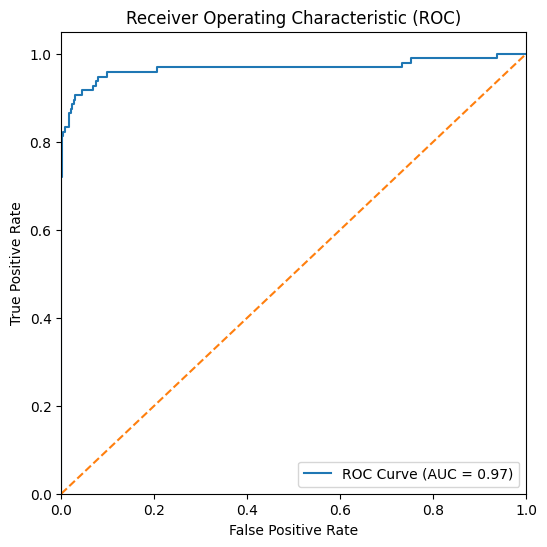

In [56]:
# Plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

#### We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

#### Model summary

#### * Train set
 * Accuracy = 0.99
 * Sensitivity = 0.70
 * Specificity = 0.99
 * F1-Score = 0.76
 * ROC = 0.99
* Test set
 * Accuracy = 0.99
 * Sensitivity = 0.77
 * Specificity = 0.99
 * F1-Score = 0.65
 * ROC = 0.97
#### Overall, the model is performing well in the test set, what it had learnt from the train set.

### XGBoost

In [57]:
#importing xg boost
!pip install xgboost
from xgboost import XGBClassifier

#### Tuning the hyperparameters

In [58]:
#hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
            'subsample': [0.3, 0.6, 0.9]}

#specify model
xgb_model = XGBClassifier(max_dapth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                       param_grid = param_grid,
                       scoring= 'roc_auc',
                       cv = folds,
                       verbose = 1,
                       return_train_score=True)

# fit the model
model_cv.fit(X_train, Y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...obs=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.2, 0.6], 'subsample': [0.3, 0.6, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displa

In [59]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.797156,0.369989,0.115324,0.012624,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.976783,0.962040,0.979294,0.972706,0.007611,1,1.000000,1.000000,1.000000,1.000000,1.544407e-07
1,4.263610,0.865705,0.138174,0.021836,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.916391,0.939845,0.968755,0.941664,0.021416,2,0.984997,0.999990,1.000000,0.994996,7.070289e-03
2,2.966918,0.640799,0.128493,0.017394,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.940015,0.492291,0.902334,0.778213,0.202762,3,0.992516,0.496022,0.988483,0.825674,2.331045e-01
3,2.361958,0.248187,0.071400,0.010884,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.500000,0.500000,0.500000,0.500000,0.000000,5,0.500000,0.500000,0.500000,0.500000,0.000000e+00
4,2.206427,0.077607,0.068508,0.005663,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.500000,0.500000,0.492409,0.497470,0.003578,6,0.500000,0.500000,0.495999,0.498666,1.885919e-03
5,2.453162,0.551912,0.080322,0.020254,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.894809,0.500000,0.505777,0.633529,0.184768,4,0.995009,0.500000,0.517114,0.670708,2.294224e-01


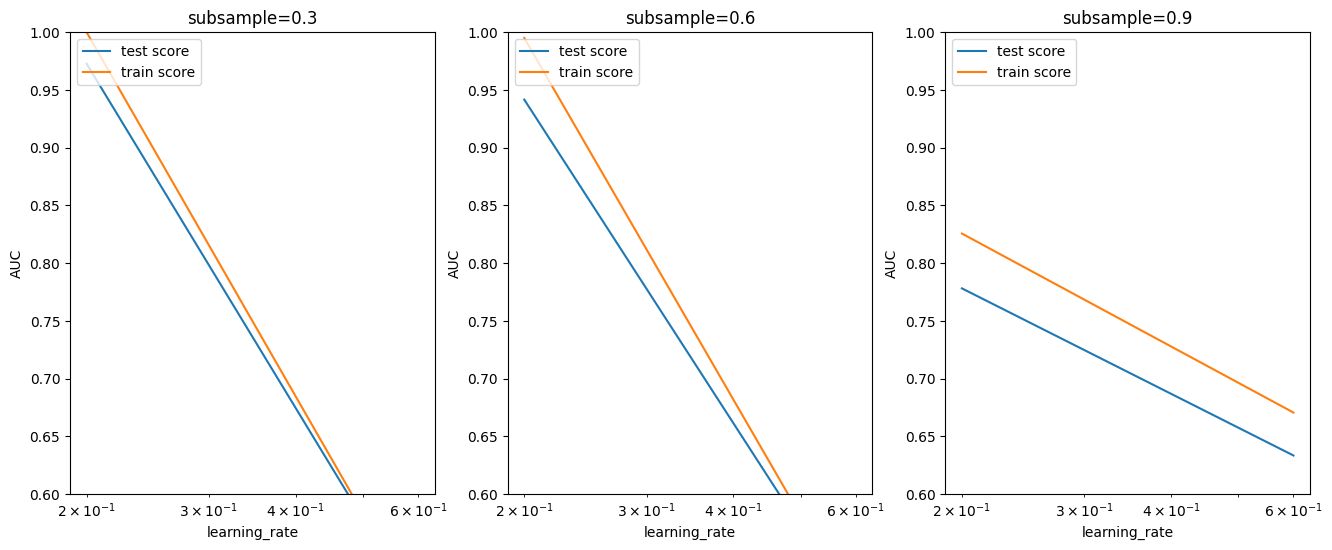

In [60]:
#plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}
for n, subsample in enumerate(param_grid['subsample']):

    #subplot 1/n
    plt.subplot(1,len(param_grid['subsample']),n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyper parameter
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameter as learning_rate :0.2 and subsample:0.3

In [61]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [62]:
# chosen hyperparameters
#"objective":'binary logistic' outputs probability rather than label, which weneed for calculating auc
params = {'learning_rate': 0.2,
         'max_depth': 2,
         'n_estimators':200,
         'subsample':'binary:logistic'}

#fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, Y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

#### Prediction on the train set

In [63]:
# Prediction on the train set
Y_train_pred = xgb_imb_model.predict(X_train)

In [64]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train,Y_train_pred)
print(confusion)

[[227449      0]
 [     4    392]]


In [65]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] #false negatives

In [66]:
#Accuracy
print("Accuracy:-",metrics.accuracy_score, Y_train_pred)

#sensitivity
print("Sensitivity:-",TP / float(TP+FN))

#Specificity
print("Specificity:-", TN / float(TN+FP))

#F1 score
print("F1-Score:-", f1_score(Y_train,Y_train_pred))

Accuracy:- <function accuracy_score at 0x000001D4915AF4C0> [0 0 0 ... 0 0 0]
Sensitivity:- 0.98989898989899
Specificity:- 1.0
F1-Score:- 0.9949238578680203


In [67]:
# classification report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      0.99      0.99       396

    accuracy                           1.00    227845
   macro avg       1.00      0.99      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [68]:
# predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [69]:
# roc_auc
auc = metrics.roc_auc_score(Y_train, y_train_pred_proba_imb_xgb)
auc

0.9999980792674978

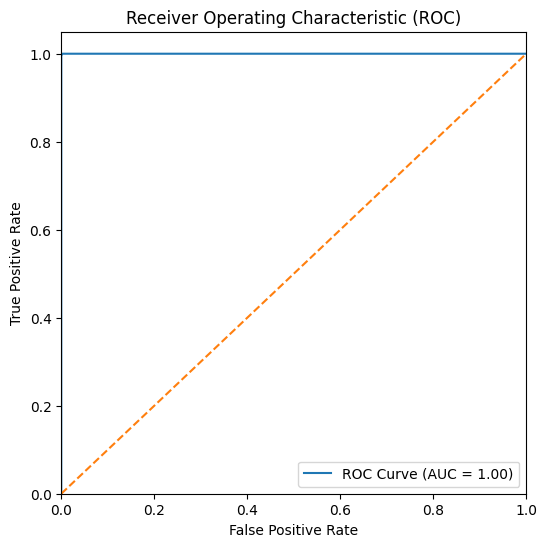

In [70]:
# Plot the ROC curve
draw_roc(Y_train, y_train_pred_proba_imb_xgb)

#### Prediction on the test set

In [71]:
# prediction on the test set
y_test_pred = xgb_imb_model.predict(X_test)


In [72]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, y_test_pred)
print(confusion)

[[56856    10]
 [   27    69]]


In [73]:
TP = confusion[1, 1] # true positives
TN = confusion[0, 0] # true negatives
FP = confusion[0, 1] # false positives
FN = confusion[1, 0] # false negatives


In [74]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Spesificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(Y_test, y_test_pred))

Accuracy:- 0.9993504441557529
Sensitivity:- 0.71875
Spesificity:- 0.9998241479970457
F1-Score:- 0.7885714285714286


In [75]:
# Classification_report
print(classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.87      0.72      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [76]:
# Predicted probability
Y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [77]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)
auc

0.9046202549267869

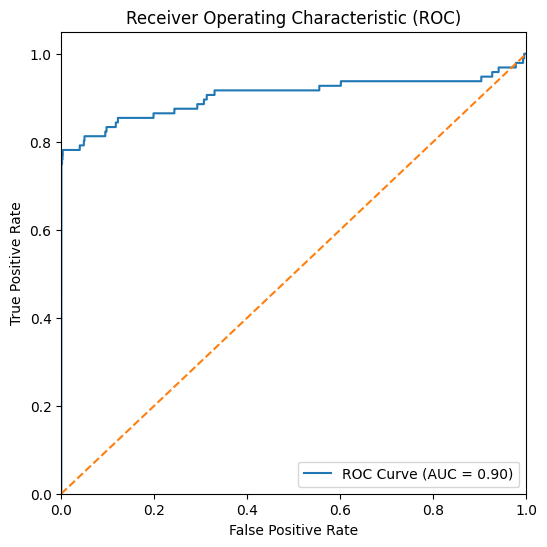

In [78]:
# plot the roc curve
draw_roc(Y_test, Y_test_pred_proba)

Model summary

  * Train set
 * Accuracy = 0.99
 * Sensitivity = 0.85
 * Specificity = 0.99
 * ROC-AUC = 0.99
 * F1-Score = 0.90
  * Test set
 * Accuracy = 0.99
 * Sensitivity = 0.75
 * Specificity = 0.99
 * ROC-AUC = 0.98
 * F-Score = 0.79
Overall, the model is performing well in the test set, what it had learnt from the train set.

Decision Tree

In [79]:
#Decision tree
# importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [80]:
# Creste the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_leaf': range(50, 150, 50),
} 

# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                          param_grid = param_grid,
                          scoring= 'roc_auc',
                          cv = 3,
                          verbose = 1)
#Fit the grid search to the data
grid_search.fit(X_train,Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also dis

In [81]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.487129,0.035961,0.047420,0.006667,5,50,"{'max_depth': 5, 'min_samples_leaf': 50}",0.933337,0.933180,0.923876,0.930131,0.004424,3
1,5.743973,0.104505,0.037219,0.003864,5,100,"{'max_depth': 5, 'min_samples_leaf': 100}",0.933297,0.936720,0.944598,0.938205,0.004732,1
2,11.352409,0.412022,0.049587,0.003988,10,50,"{'max_depth': 10, 'min_samples_leaf': 50}",0.924914,0.916425,0.930483,0.923941,0.005780,4
3,10.901374,0.362890,0.051205,0.000849,10,100,"{'max_depth': 10, 'min_samples_leaf': 100}",0.933459,0.919672,0.944114,0.932415,0.010006,2


In [82]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)


In [83]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion= "gini",
                                      random_state = 100,
                                      max_depth=5,
                                      min_samples_leaf=100,
                                      min_samples_split=100)
dt_imb_model.fit(X_train, Y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",100
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",100
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",100
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

#### Prediction on the train set

In [84]:
#Prediction on the train set
Y_train_pred = dt_imb_model.predict(X_train)

In [85]:
#confusion matrix
confusion = metrics.confusion_matrix(Y_train,Y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [86]:
TP = confusion[1, 1] # true positives
TN = confusion[0,0] # true negetives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negetives

In [87]:
# Accuracy
print("Accuracy;-",metrics.accuracy_score(Y_train,Y_train_pred))

#Sensitivity
print("Sensitivity:-", TP / float(TP+FN))

# specificity
print("Specificity:-",TN / float(TN+FP))

#F1 score 
print("F1-score:-", f1_score(Y_train, Y_train_pred))

Accuracy;- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-score:- 0.749003984063745


In [88]:
# Classification report
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [89]:
#predicted probability
Y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [90]:
# roc_auc
auc = metrics.roc_auc_score(Y_train, Y_train_pred_proba)
auc

0.9534547393930157

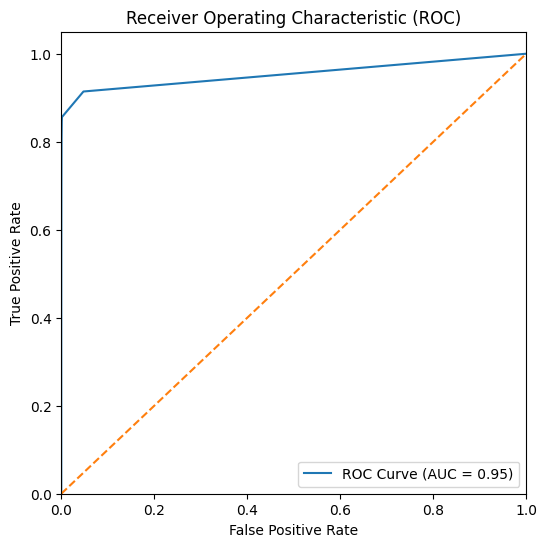

In [91]:
# Plot the ROC curve
draw_roc(Y_train, Y_train_pred_proba)

#### Prediction on the test set

In [92]:
## prediction on the test set
Y_test_pred = dt_imb_model.predict(X_test)

In [93]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [94]:
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score(Y_test, Y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

#Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-score:-", f1_score(Y_train, Y_train_pred))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-score:- 0.749003984063745


In [96]:
# classification report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [97]:
#predicted probability
Y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [98]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)
auc

0.92174979703748

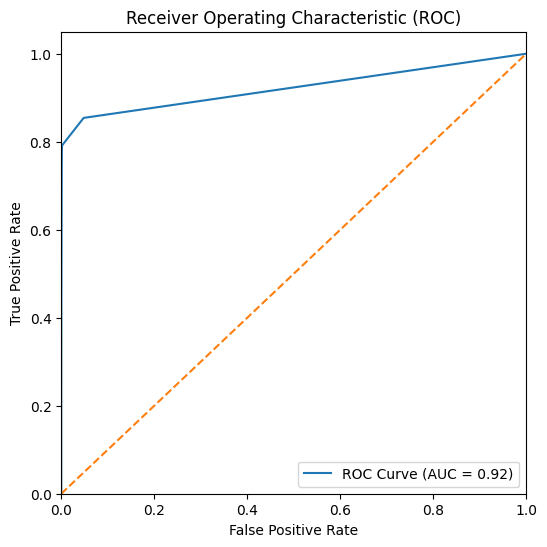

In [99]:
#plot the ro curve
draw_roc(Y_test, Y_test_pred_proba)

#### Model summary

 * Train set
    * Accuracy = 0.99
    * Sensitivity = 1.0
    * Specificity = 1.0
    * F1-Score = 0.75
    * ROC-AUC = 0.95
  * Test set
    * Accuracy = 0.99
    * Sensitivity = 0.58
    * Specificity = 0.99
    * F-1 Score = 0.75
    * ROC-AUC = 0.92

### Random forest

In [ ]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, Y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


In [ ]:
# printing the optimal accuracy score and hyperparameter
print('we can get accuracy of', grid_search.best_score_,'using', grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
rfc_imb_model = RandomForestClassifier (bootstrap=True,
                                       max_depth=5,
                                       min_samples_leaf=50,
                                       min_samples_split=50,
                                       max_features=10,
                                       n_estimators=100)


In [ ]:
# Fit the model
rfc_imb_model.fit(X_train, Y_train)

####  Prediction on the train set

In [ ]:
#predictions on the train set
Y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# confusion matrics
confusion = metrics.confusion_matrix(Y_train, Y_train)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false negatives
FN = confusion[1,0] # false negatives

In [ ]:
#Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train, Y_train_pred))

#sensitivity
print("Sensitivity:-", TP / float(TP+FN))

#specificity
print("specificity:-", TN / float ( TN+FP))

# F1 score
print("F1-score:-", f1_score(Y_train,Y_train_pred))

In [ ]:
#classification_report
print(classification_report(Y_train, Y_train_pred))

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_train, Y_train_pred_proba)
auc

In [ ]:
# plot the roc curve
draw_roc(Y_train, Y_train_pred_proba)

#### predictions on the test set

In [ ]:
# oresictions on the test set
Y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,0] # true positives
TN = confusion[0,0] # true negetives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negetives

In [ ]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score(Y_test,Y_test_pred))

# sensitivity
print("sensitivity:-", TP / float(TP+FN))

#specificity
print("specificity:-", TN / float(TN+FP))

#F1 score
print("F1-score:-", f1_score(Y_train, Y_train_pred))

In [ ]:
# Classification_report
print(classification_report(Y_test,Y_test_pred))

In [ ]:
# Predicted probability
Y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)

In [ ]:
# plot the roc curve
draw_roc(Y_test, Y_test_pred_proba)


### Model summary

* Train set
  * Accuracy = 0.99
  * Sensitivity = 1.0
  * Specificity = 1.0
  * F1-Score = 0.80
  * ROC-AUC = 0.98
* Test set
  * Accuracy = 0.99
  * Sensitivity = 0.62
  * Specificity = 0.99
  * F-1 Score = 0.75
  * ROC-AUC = 0.96
#### Choosing best model on the imbalanced data
We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, and Random Forest), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as XGBoost, which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. But XGBoost having ROC score 0.98, which is 0.01 more than the Logistic model. The 0.01 increase of score may convert into huge amount of saving for the bank.

#### Print the important features of the best model to understand the dataset
 * This will not give much explanation on the already transformed dataset
 * But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(Y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(Y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### print the FPR, TPR & select the best threshold from the roc curve for the best model

In [ ]:
print('Train auc =', metrics.roc_auc_score(Y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(Y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

# Handling data imbalance

#### As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

 * Undersampling :- Here for balancing the class distribution, the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)
 * Oversampling :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
 * SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.
 * Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

### Undersampling

In [ ]:
# Importing undersampler library
!pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler()
# resampling x, y
X_train_rus, Y_train_rus = rus.fit_resample(X_train, Y_train)


## model building on balanced data with undersampling

### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifying score as roc-auc
model_cv= GridSearchCV(estimator= LogisticRegression(),
                      param_grid = params,
                      scoring='roc_auc',
                      cv = folds,
                      verbose = 1,
                      return_train_score=True)
#Fit the model
model_cv.fit(X_train_rus, Y_train_rus)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("The highest test roc_auc is {0} at C ={1}".format (best_score, best_C))

### Logistic regression with optimal C

In [ ]:
# instantiate the model with the best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [ ]:
#fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, Y_train_rus)

In [ ]:
# predictions on the train set
Y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train_rus, Y_train_pred)

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negetives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negetives

In [ ]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score(Y_train_rus, Y_train_pred))

#Sensitivity
print("sensitivity:-", TP / float(TP+FN))

# Specificity
print("specificity:-", TN / float(TN+FP))

#F1 score
print("F!- Score:-", f1_score(Y_train_rus, Y_train_pred))

In [ ]:
# Classification_report
print(classification_report(Y_train_rus, Y_train_pred))

In [ ]:
# Predicted probability
Y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
#roc_auc
auc = metrics.roc_auc_score(Y_train_rus, Y_train_pred_proba)
auc

In [ ]:
# plot the roc curve
draw_roc(Y_train_rus, Y_train_pred_proba)

### prediction on the test set

In [ ]:
Y_test_pred = logistic_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
# accuracy
print("accuracy:-",metrics.accuracy_score(Y_test, Y_test_pred))

#Sensitivity
print("sensitivity:-", TP / float(TP+FN))

# Specificity
print("specificity:-", TN / float(TN+FP))

In [ ]:
# Classification_report
print(classification_report(Y_test, Y_test_pred))

In [ ]:
# Predicted probability
Y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

 ### model summary
 - Train set
   * Accuracy = 0.95
   * Sensitivity = 0.92
   * Specificity = 0.98
   * ROC = 0.99
- Test set
  * Accuracy = 0.97
  * sensitivity= 0.86
  * specificity= 0.97
  * ROC = 0.96

### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up Grid SerchCV()
model_cv = GridSearchCV (estimator = xgb_model,
                        param_grid = param_grid,
                        scoring = 'roc_auc',
                        cv= folds,
                        return_train_score = True)
#fit the model
model_cv.fit(X_train_rus, Y_train_rus)

In [ ]:
#cv result
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
print(cv_results.columns)

In [ ]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### model with optimal hypeerparameters
##### we see the train score almost touches to 1.
##### Among the hypermarameters, we can choose the best parameter as learning_rate: 0.2 
##### and subsample:0.3

In [ ]:
model_cv.best_params_

In [ ]:
# chosen hyperparameters
# 'odjective':'binary:logistic' outputs probability rater than label, which we need for calculating auc
params = {'learning_rate': 0.2,
         'max_depth': 2 ,
         'n_estimators':200 ,
         'subsample': 0.6 ,
         'objective':'binary:logistic'}
# fit model on training data
xgb_bal_rus_model = XGBClassifier(params=params)
xgb_bal_rus_model.fit(X_train_rus, Y_train_rus)

#### prediction on the train set

In [ ]:
Y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train_rus, Y_train_rus)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score(Y_train_rus, Y_train_pred))

#Sensitivity
print("sensitivity:-", TP / float(TP+FN))

# Specificity
print("specificity:-", TN / float(TN+FP))

In [ ]:
# classification_repoet
print(classification_report(Y_train_rus, Y_train_pred))

In [ ]:
# Predicted probability
Y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_train_rus, Y_train_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_train_rus, Y_train_pred_proba)

#### Prediction on the test set

In [ ]:
# Predictions on the test set
Y_test_pred = xgb_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion [0,1]
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score(Y_test,Y_test_pred))

# Sensitivity
print("Specificity:-", TP / float(TP+TN))

# Specificity
print("Specificity:-", TN / float(TN+FP))
      

In [ ]:
# Classification_report
print(classification_report(Y_test, Y_test_pred))

In [ ]:
# Predicted probability
Y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
#roc_auc
auc = metrics.roc_auc_score(Y_test,Y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

model summary
* Train set
   * Accuracy = 1.0
   * sensitivity = 1.0
   * specificity = 1.0
   * ROC-AUC = 1.0
* Test set
   * Accuracy = 0.96
   * sensitivity = 0.92
   * specificity = 0.96
   * ROC-AUC = 0.98

### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,Y_train_rus)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# printing the optimal sensitivityscore hyperparameeters
print("Beat roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini",
                                          random_state = 100,
                                          max_depth = 5,
                                          min_samples_leaf=50,
                                          min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, Y_train_rus)


#### prediction on the train set

In [ ]:
Y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train_rus, Y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train_rus, Y_train_pred))
# Sensitivity
print("Sensitivity:-", TP / float(TP+FN))
# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
#Classification_report
print(classification_report(Y_train_rus, Y_train_pred))

In [ ]:
#predited probability
Y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_train_rus, Y_train_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_train_rus, Y_train_pred_proba)

#### Prediction on the set

In [ ]:
Y_test_pred = dt_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matricx
confusion = metrics.confusion_matrix(Y_test,Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[ 0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
#Accuracy
print("accuracy:-", metrics.accuracy_score(Y_test,Y_test_pred))
# Sensitivity
print("sensitivity:-", TP / float(TP+FN))
# Specificity
print("specificity:", TN/float(TN+FP))

In [ ]:
# Classification_report
print(classification_report(Y_test,Y_test_pred))

In [ ]:
# Predicted probability
Y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test,Y_test_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

#### model summary
* Train set
   * Accuracy = 0.93
   * sensitivity = 0.88
   * specificity = 0.97
   * ROC-AUC = 0.98
* Test set
   * Accuracy = 0.96
   * sensitivity = 0.85
   * specificity= 0.96
   * ROC-AUC= 0.96

### Random Forest

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, Y_train_rus)

In [ ]:
# Printing the optimal accuracyscore and hyperparameter
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                                          max_depth=5,
                                          min_samples_leaf=50,
                                          min_samples_split=50,
                                          max_features=10,
                                          n_estimators=200)


In [ ]:
#Fit the model
rfc_bal_rus_model.fit(X_train_rus, Y_train_rus)

#### Prediction on the train set

In [ ]:
#Predictions on the train set
Y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [ ]:
#Confusion matrics
confusion = metrics.confusion_matrix(Y_train_rus, Y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
#Accuracy 
print("Accuracy:-",metrics.accuracy_score(Y_train_rus, Y_train_pred))
#sensitivity
print("sensitivity:-", TP / float(TP+FN))
# Specificity
print("specificity:-", TN / float(TN+FP))
#F1 score
print("F1-score:-", f1_score(Y_train_rus, Y_train_pred))

In [ ]:
# Classification report
print(classification_report(Y_train_rus, Y_train_pred))

In [ ]:
# predicted probability
Y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
#roc_auc
auc = metrics.roc_auc_score(Y_train_rus, Y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(Y_train_rus, Y_train_pred_proba)

#### Prediction on the test set


In [ ]:
Y_test_pred = rfc_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrics
confusion= metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score(Y_test, Y_test_pred))
# Sensitivity
print("Sensitivity:-", TP / float(TP+FN))
# Specificity
print("specificity:-", TN / float(TN+FP))

In [ ]:
#Classification _report
print(classification_report(Y_test,Y_test_pred))

In [ ]:
# Prediction probability
Y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
#roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

#### model summary
* Train set
   * Accuracy = 0.94
   * sensitivity = 0.89
   * specificity = 0.98
   * ROC-AUC = 0.98
* Test set
   * Accuracy = 0.98
   * sensitivity = 0.83
   * specificity= 0.98
   * ROC-AUC= 0.97

## Oversampling

In [ ]:
# importing oversampler library
!pip install --upgrade imbalanced-learn --trusted-host pypi.org --trusted-host files.pythonhosted.org
from imblearn.over_sampling import RandomOverSampler

In [ ]:
pip show imbalanced-learn

In [ ]:
# instantiating the random oversampler
roc = RandomOverSampler()
# resampling x, y
X_train_ros, Y_train_ros = ros.fit_resample(X_train, Y_train)

In [ ]:
# before sampling class diatribution
print('before sampling class distribution:-', Counter(Y_train))
# new class distribution
print('New class distribution:-', Counter(Y_train_ros))

## Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test roc_auc is {0} at C = {1}". format(best_score, best_C))

#### Logistic regression with optimal C

In [ ]:
# instantiate the model with best C
logistic_bal_ros = LogisticRegression(c=0.1)

In [ ]:
# fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit = LogisticRegression(C=0.1)

In [ ]:
# fit the model in the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, Y_train_ros)

#### Prediction on the train set

In [ ]:
Y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrics
confusion = metrics.confusion_matrix(Y_train_ros, Y_train_pred)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
# Accuracy 
print("Accuracy:-", metrics.accuracy_score(Y_train_ros,Y_train_pred))
#Sensitivity
print("Sensitivity:-", TP / float (TP+FN))
#Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Classification_report
print(classification_report(Y_train_ros, Y_train_pred))

In [ ]:
# predicted probability
Y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_train_ros, Y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(Y_train_roc, Y_train_pred_proba)

#### Prediction on the test set

In [ ]:
# prediction on the test set
Y_test_pred = logistic_bal_ros_model.predict(X_test)

In [ ]:
# confusion matrics
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score(Y_test,Y_test_pred))
#sensitivity
print("Sensitivity:-", TP / float(TP+FN))
# specificity
print("specificity:-", TN / float(TN+FP))

In [ ]:
# Classification_report
print(classification_report(Y_test, Y_test_pred))

In [ ]:
# predicted probability
Y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test,Y_test_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

#### model summary
* Train set
   * Accuracy = 0.95
   * sensitivity = 0.92
   * specificity = 0.97
   * ROC-AUC = 0.98
* Test set
   * Accuracy = 0.97
   * sensitivity = 0.89
   * specificity= 0.97
   * ROC-AUC= 0.97

#### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Model with optimal hyperparameters
 We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_paarams_

In [ ]:
#  chosen hyperparameters
params = {'learning_rate': 0.6,
         'max_depth':2,
         'n_estimators':200,
         'subsample':0.9,
         'objective':'binary:logistic'}
# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, Y_train_ros)

#### Prediction on the train set

In [ ]:
Y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train_ros, Y_train_ros)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score_train_ros, Y_train_pred)
# Sensitivity
print("Sensitivity:-", TP / float(TP+FN))
# Specificity
print("specificity:-", TN / float(TN+FP))

In [ ]:
# Classification report
print(classification_report(Y_train_ros, Y_train_pred))

In [ ]:
# predicted probability
Y-train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# ros_auc
auc = metrics.roc_auc_score(Y_train_ros, Y_train_pred_proba)

In [ ]:
# Plot the ROC curve
draw_roc(Y_train_roc, Y_train_pred_proba)

#### preddiction on the test set

In [ ]:
 Y_train_pred = xgb_bal_ros_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-", metrics.accuracy_score(Y_test, Y_test_pred))
# Sencitivity
print("sensitivity:-", TP / float(TP+FN))
# Specificity
print("specificity:-", TN / float(TN+FP))

In [ ]:
# Classification report
print(classification_report(Y_test, Y_test_pred))

In [ ]:
# prediction probability
Y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)

In [ ]:
# plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

 model summary
* Train set
     * Accuracy = 1.0
     * sensitivity = 1.0
     * specificity = 1.0
     * ROC-AUC = 1.0
* Test set
     * Accuracy = 0.99
     * sensitivity = 0.80
     * specificity= 0.99
     * ROC-AUC= 0.97

#### Decision Tree

In [ ]:
param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}
dtree = DecisionTreeClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid,
                           scoring = 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros, y_train_ros)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# printing the optimal sensitivity score
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

#### Predictions on the train set

In [ ]:
Y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train_ros, Y_train_pred)
print(confusion)

In [ ]:
TP = confusiom[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
#Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# clasification_report
print(classification_report(Y_train_ros, Y_train_pred))

In [ ]:
# Predicted probability
Y_train_pred_proba =dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# ros_auc
auc = metrics.roc_auc_score(Y_train_ros, Y_train_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_train_ros, Y_train_pred_proba)

#### prediction on the test set

In [ ]:
Y_test_pred = dt_bal_ros_model.predict(X_test)

In [ ]:
# confusion matrix
confusion = metrics.confusion_matrix(Y_test,Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


In [ ]:
# Classification report
print(classification_report(Y_test, Y_test_pred))

In [ ]:
# Predicted probability
Y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

#### model summary
* Train set
 * Accuracy = 0.99
 * sensitivity = 1.0
 * specificity = 0.99
 * ROC-AUC = 0.99
* Test set
 * Accuracy = 0.99
 * sensitivity = 0.79
 * specificity= 0.99   
 * ROC-AUC= 0.90

### SMOTE (Synthetic minorty Oversampling Technique)

#### we are creating synthetic samples by doing upsampling using (Synthetic minorty oversampling atechnique)

In [ ]:
# impoting smote
from imblearn.over_sampling import SMOTE

In [ ]:
# instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, Y_train_smote = sm.fit_resample(X_train, Y_train)

In [ ]:
print('Before SMOTE oversampling X_train shape=', X_train.shape)
print('After SMOTE oversampling X_train shape', X_train_smote.shape)

#### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, Y_train_smote)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(" The highest test roc-auc is {0} at C = {1}". format (best_score, best_C))

#### logistic regression with optimal C

In [ ]:
# instaintiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [ ]:
# fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, Y_train_smote)

#### prediction on the train set

In [ ]:
Y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrics
confusion = metrics.confusion_matrix(Y_train_smote, Y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train_smote, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Classification report
print(classification_report(Y_train_smote, Y_train_pred))

In [ ]:
# predicted probability
Y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# plot the ROC curve
draw_roc(Y_train_smote, Y_train_pred_proba_log_bal_smote)

#### prediction on the test set

In [ ]:
Y_test_pred = logistic_bal_smote_model.predict(X_test)

In [ ]:
# confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification report
print(classification_report(Y_test, Y_test_pred))

#### ROC on the test set

In [ ]:
# predicted probability
Y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# Plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

#### model summary
* Train set
  * Accuracy = 0.95
  * sensitivity = 0.92
  * specificity = 0.98
* Test set
  * Accuracy = 0.97
  * sensitivity = 0.90
  * specificity= 0.99
  * ROC-AUC= 0.97


#### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, Y_train_smote)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, Y_train_smote)

#### Prediction on the train set

In [ ]:
Y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train_smote, Y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train_smote, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Classification report
print(classification_report(Y_train_smote, Y_train_pred))

In [ ]:
# Predicted probability
Y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# Plot the ROC curve
draw_roc(Y_train_smote, Y_train_pred_proba)

#### Prediction on the test set

In [ ]:
Y_test_pred = xgb_bal_smote_model.predict(X_test)

In [ ]:
# confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# Classification report
print(classification_report(Y_test, Y_test_pred))

In [ ]:
# predicted probability
Y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test,Y_test_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

#### model summary
* Train set
  * Accuracy = 0.99
  * sensitivity = 1.0
  * specificity = 0.99
  * ROC-AUC = 1.0  
* Test set
  * Accuracy = 0.99
  * sensitivity = 0.79
  * specificity= 0.99
  * ROC-AUC= 0.97

##### overall, the model is performing well in the test set, what it had learnt from the train set

#### Decision tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,Y_train_smote)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# printing the optimal sensitivity score and hyperparameter
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, Y_train_smote)

#### Prediction on the train set

In [ ]:
# predictions on the train set
Y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(Y_train_smote, Y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train_smote, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification report
print(classification_report(Y_train_smote, Y_train_pred))

In [ ]:
# predicted probability
Y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:, 1]

In [ ]:
# roc-auc
auc = metrics.roc_auc_score(Y_train_smote, Y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(Y_train_smote, Y_train_pred_proba)

#### prediction on the test set

In [ ]:
Y_test_pred = dt_bal_smote_model.predict(X_test)

In [ ]:
# confusion matrix
confusion = metrics.confusion_matrix(Y_test,Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification report
print(classification_report(Y_test,Y_test_pred))

In [ ]:
# predicted probability
Y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_test,Y_test_pred_proba)

#### model summary
* Train set
  * Accuracy = 0.99
  * sensitivity = 0.99
  * specificity = 0.98
  * ROC-AUC = 0.99
* Test set
  * Accuracy = 0.98
  * sensitivity = 0.80
  * specificity= 0.98
  * ROC-AUC= 0.98

### AdaSyn (Adaptive Synthetic Sampling)

In [ ]:
# importing adasyn
from imblearn.over_sampling import ADASYN

In [ ]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, Y_train_adasyn = ada.fit_resample(X_train, Y_train)

In [ ]:
# Before sampling class distribution
print('Before sampling class distribution:-', Counter(Y_train))
# new class distribution
print('New class distribution:-', Counter(Y_train_adasyn))

### Logistic Regression

In [ ]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, Y_train_adasyn)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [ ]:
# Fit the model pn the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, Y_train_adasyn)

#### prediction on the train set

In [ ]:
Y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# confusion matrix
confusion = metrics.confusion_matrix(Y_train_adasyn, Y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train_adasyn, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification report
print(classification_report(Y_train_adasyn, Y_train_pred))

In [ ]:
# Predicted probability
Y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_train_adasyn, Y_train_pred_proba)

In [ ]:
# plot the ROC curve
draw_roc(Y_train_adasyn, Y_train_pred_proba)

#### Prediction on the test set

In [ ]:
Y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [ ]:
# confusion matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification report
print(classification_report(Y_test,Y_test_pred))

In [ ]:
# predicted probability
Y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

#### model summary
* Train set
  * Accuracy = 0.88
  * sensitivity = 0.86
  * specificity = 0.91
  * ROC-AUC = 0.96
* Test set
  * Accuracy = 0.90
  * sensitivity = 0.95
  * specificity= 0.90
  * ROC-AUC= 0.97

#### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,Y_train_adasyn)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# printing the optimal sensitivity score and hyperparameter
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier (criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, Y_train_adasyn)

#### Prediction on the train set

In [ ]:
#  Prediction on the train set
Y_train_pred= dt_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# confusion matrix
confusion = metrics.confusion_matrix(Y_train_adasyn, Y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification report
print(classification_report(Y_train_adasyn, Y_train_pred))

In [ ]:
# predicted probability
Y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_train_adasyn, Y_train_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_train_adasyn, Y_train_pred_proba)

#### Prediction on the test set


In [ ]:
Y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [ ]:
#  Confusion matrix
confusion = metrics.confusion_matrix(Y_test,Y_test_pred_proba)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification report
print(classification_report(Y_test, Y_test_pred))

In [ ]:
# predicted probability
Y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_tesst)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

#### model summary
* Train set
  * Accuracy = 0.97
  * sensitivity = 0.99
  * specificity = 0.95
  * ROC-AUC = 0.99
* Test set
  * Accuracy = 0.95
  * sensitivity = 0.84
  * specificity= 0.95
  * ROC-AUC= 0.91

#### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn,Y_train_adasyn)

### prediction on the train set

In [ ]:
Y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# confusion matrix
confusion = metrics.confusion_matrix(Y_train_adasyn, Y_train_adasyn)
print(confusiom)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_train_adasyn, Y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification report
print(classification_report(Y_train_adasyn, Y_train_pred))

In [ ]:
# predicted probability
Y_train_pred_proba = xgb_bal_adasyn_model.predct_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_train_adasyn, U_train_pred_proba)
auc

In [ ]:
# plot the ROC curve
draw_roc(Y_train_adasyn, Y_train_pred_proba)

#### prediction on the test set

In [ ]:
Y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [ ]:
# confution matrix
confusion = metrics.confusion_matrix(Y_test, Y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(Y_test , Y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification report
print(classification_report(Y_test, Y_test_pred))

In [ ]:
# predicted probability
Y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(Y_test, Y_test_pred_proba)
auc

In [1]:
# plot the ROC curve
draw_roc(Y_test, Y_test_pred_proba)

NameError: name 'draw_roc' is not defined

#### model summary
* Train set
  * Accuracy = 0.99
  * sensitivity = 1.0
  * specificity = 1.0
  * ROC-AUC = 1.0
* Test set
  * Accuracy = 0.99
  * sensitivity = 0.78
  * specificity= 0.99
  * ROC-AUC= 0.96

### Choosing best model on the balanced data
He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the Logistic regression model with SMOTE is the best model for its simlicity and less resource requirement.

### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

### Cost benefit analysis
We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high.

### Summary to the business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction was done by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business.